1. Choose a corpus of interest.
2. How many total unique words are in the corpus? (Please feel free to define unique words in any interesting,
defensible way).
3. Taking the most common words, how many unique words represent half of the total words in the corpus?
4. Identify the 200 highest frequency words in this corpus.
5. Create a graph that shows the relative frequency of these 200 words.
6. Does the observed relative frequency of these words follow Zipf’s law? Explain.
7. In what ways do you think the frequency of the words in this corpus differ from “all words in all corpora.”

In [1]:
#Load libraries
import nltk, re, pprint
from nltk.corpus import gutenberg
from nltk import word_tokenize
from bs4 import BeautifulSoup
from collections import Counter
import string
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
#Fetch the text of "alice"
alice_text = gutenberg.raw('carroll-alice.txt')

In [3]:
print(alice_text[:1000])

[Alice's Adventures in Wonderland by Lewis Carroll 1865]

CHAPTER I. Down the Rabbit-Hole

Alice was beginning to get very tired of sitting by her sister on the
bank, and of having nothing to do: once or twice she had peeped into the
book her sister was reading, but it had no pictures or conversations in
it, 'and what is the use of a book,' thought Alice 'without pictures or
conversation?'

So she was considering in her own mind (as well as she could, for the
hot day made her feel very sleepy and stupid), whether the pleasure
of making a daisy-chain would be worth the trouble of getting up and
picking the daisies, when suddenly a White Rabbit with pink eyes ran
close by her.

There was nothing so VERY remarkable in that; nor did Alice think it so
VERY much out of the way to hear the Rabbit say to itself, 'Oh dear!
Oh dear! I shall be late!' (when she thought it over afterwards, it
occurred to her that she ought to have wondered at this, but at the time
it all seemed quite natural); but

# Tokenize Words

In [4]:
text = word_tokenize(alice_text)
text[:50]

['[',
 'Alice',
 "'s",
 'Adventures',
 'in',
 'Wonderland',
 'by',
 'Lewis',
 'Carroll',
 '1865',
 ']',
 'CHAPTER',
 'I',
 '.',
 'Down',
 'the',
 'Rabbit-Hole',
 'Alice',
 'was',
 'beginning',
 'to',
 'get',
 'very',
 'tired',
 'of',
 'sitting',
 'by',
 'her',
 'sister',
 'on',
 'the',
 'bank',
 ',',
 'and',
 'of',
 'having',
 'nothing',
 'to',
 'do',
 ':',
 'once',
 'or',
 'twice',
 'she',
 'had',
 'peeped',
 'into',
 'the',
 'book',
 'her']

# Remove Puctuations from list of words

In [5]:
text_no_punct = alice_words_no_punct = [word.lower() for word in text if word.isalpha()]
text_no_punct[:50]

['alice',
 'adventures',
 'in',
 'wonderland',
 'by',
 'lewis',
 'carroll',
 'chapter',
 'i',
 'down',
 'the',
 'alice',
 'was',
 'beginning',
 'to',
 'get',
 'very',
 'tired',
 'of',
 'sitting',
 'by',
 'her',
 'sister',
 'on',
 'the',
 'bank',
 'and',
 'of',
 'having',
 'nothing',
 'to',
 'do',
 'once',
 'or',
 'twice',
 'she',
 'had',
 'peeped',
 'into',
 'the',
 'book',
 'her',
 'sister',
 'was',
 'reading',
 'but',
 'it',
 'had',
 'no',
 'pictures']

# 2. Get Count of Unique Words

In [6]:
word_frequencies = Counter(text_no_punct)
print(f"There are {sum(word_frequencies.values())} words in the book of Alice.")

unique_words = set(text_no_punct)
unique_word_count = len(unique_words)
print(f"Total unique words: {unique_word_count}")

There are 25465 words in the book of Alice.
Total unique words: 2470


# 3. Identify how many words account for half the text

In [7]:
# Determine how many of the most common words represent half of the total words
half_total_words = sum(word_frequencies.values()) / 2
cumulative = 0
num_words_for_half = 0

for word, count in word_frequencies.most_common():
    cumulative += count
    num_words_for_half += 1
    if cumulative >= half_total_words:
        break

print(f"The number of unique words that represent half of the text is: {num_words_for_half}")

The number of unique words that represent half of the text is: 51


# 4. Identifying the Top 200 Words by frequency

In [8]:
word_frequencies = Counter(text_no_punct)

# Print the most common 10 words
top_200_words = word_frequencies.most_common(200)
print(word_frequencies.most_common(200))

[('the', 1616), ('and', 810), ('to', 720), ('a', 631), ('she', 544), ('it', 539), ('i', 533), ('of', 499), ('said', 462), ('alice', 396), ('was', 366), ('in', 359), ('you', 356), ('that', 284), ('as', 256), ('her', 248), ('at', 209), ('on', 191), ('had', 184), ('with', 179), ('all', 178), ('be', 148), ('for', 146), ('so', 144), ('very', 139), ('not', 135), ('they', 135), ('but', 131), ('this', 131), ('little', 128), ('do', 125), ('he', 117), ('is', 113), ('out', 113), ('what', 103), ('down', 102), ('one', 99), ('up', 97), ('his', 95), ('about', 94), ('would', 90), ('them', 88), ('know', 88), ('there', 87), ('could', 86), ('were', 86), ('like', 85), ('have', 84), ('went', 83), ('again', 83), ('herself', 83), ('then', 82), ('no', 77), ('if', 75), ('queen', 75), ('thought', 74), ('when', 74), ('did', 74), ('or', 71), ('time', 68), ('me', 68), ('into', 67), ('see', 67), ('off', 65), ('king', 62), ('your', 60), ('by', 58), ('began', 58), ('turtle', 58), ('its', 57), ('an', 56), ('my', 56), 

# 5. Visualize the Top 200 Words

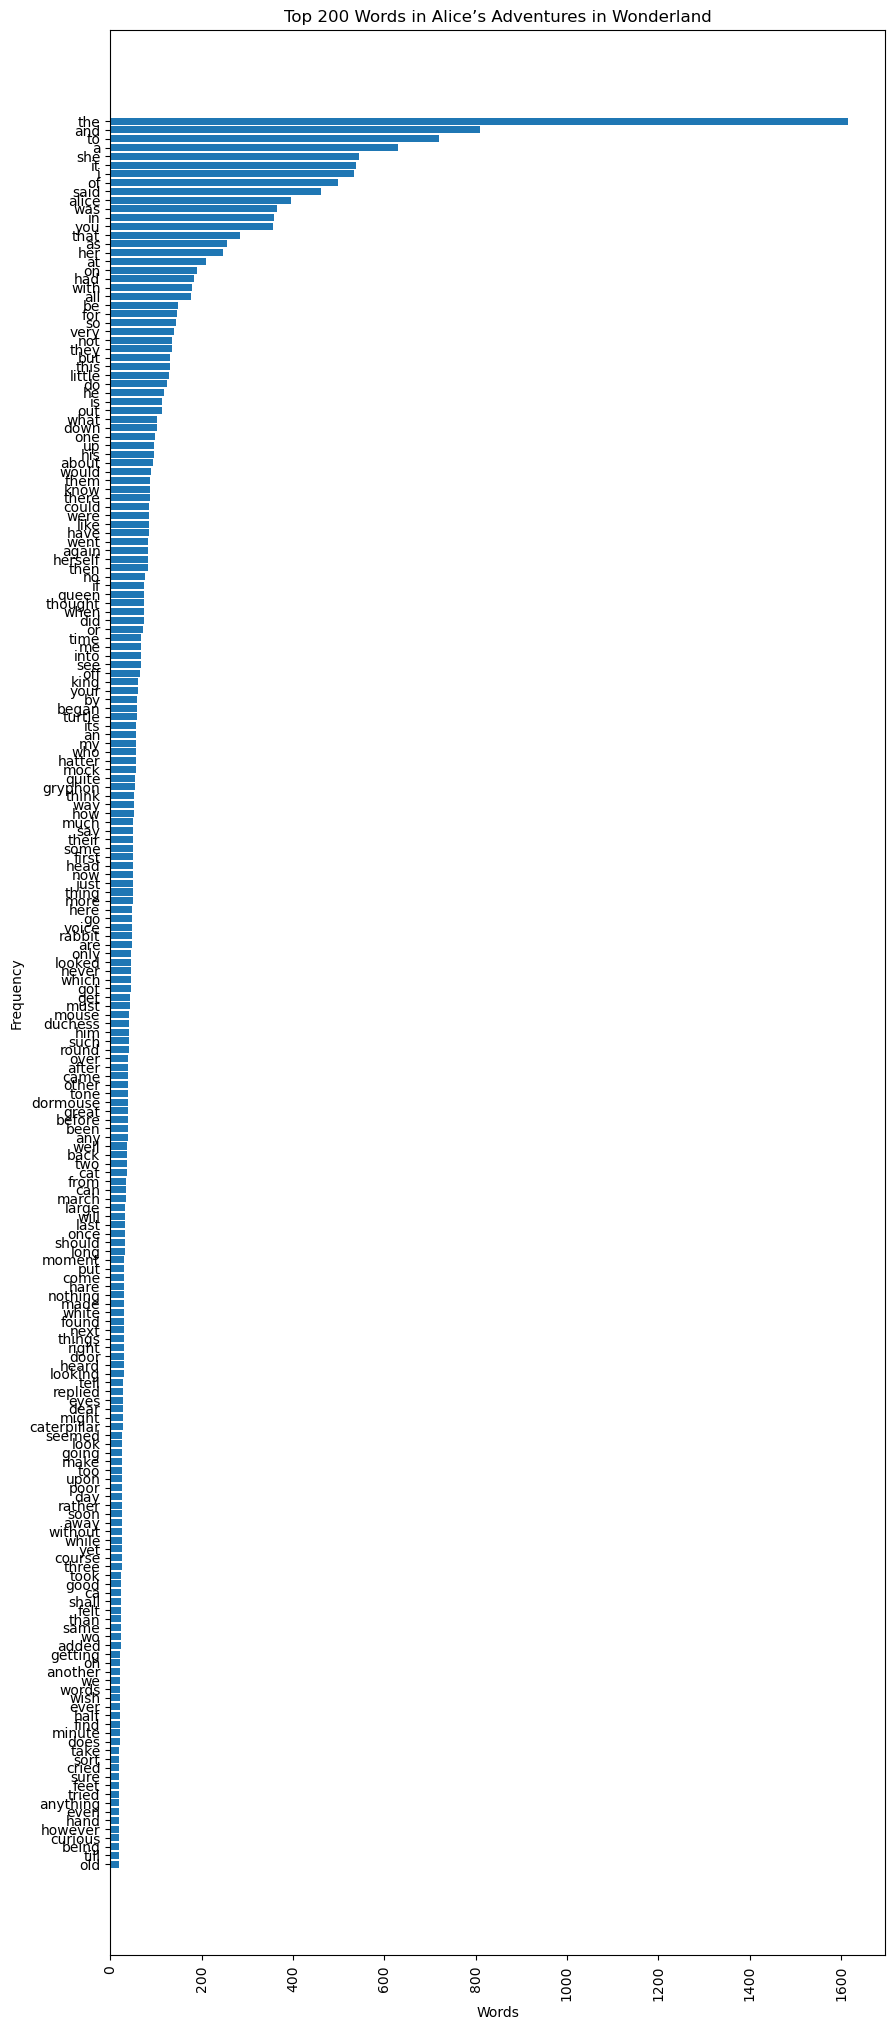

In [9]:
# Prepare data for plotting
words, frequencies = zip(*top_200_words)

# Plotting
plt.figure(figsize=(10, 25))
plt.barh(range(len(top_200_words)), frequencies[::-1], tick_label=words[::-1])
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 200 Words in Alice’s Adventures in Wonderland')
plt.xticks(rotation=90)
plt.show()

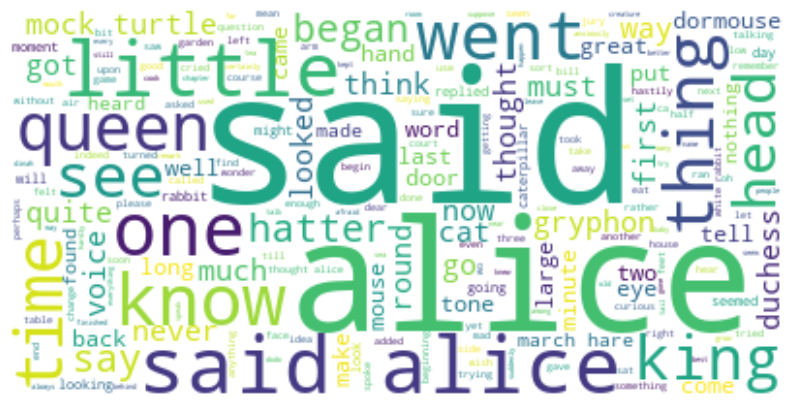

In [10]:
cleaned_text = ' '.join(text_no_punct)

# Generate a word cloud image
wordcloud = WordCloud(background_color="white").generate(cleaned_text)

# Display the generated image using matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# 6. Zipf's Law
When comparing ranks, and viewing in a loglog plot it can be seen that the text indeed follows Zipf's Law. The law states that the most frequent word occurs twice as often as the second most frequent, and three times as often as the third, and so on.

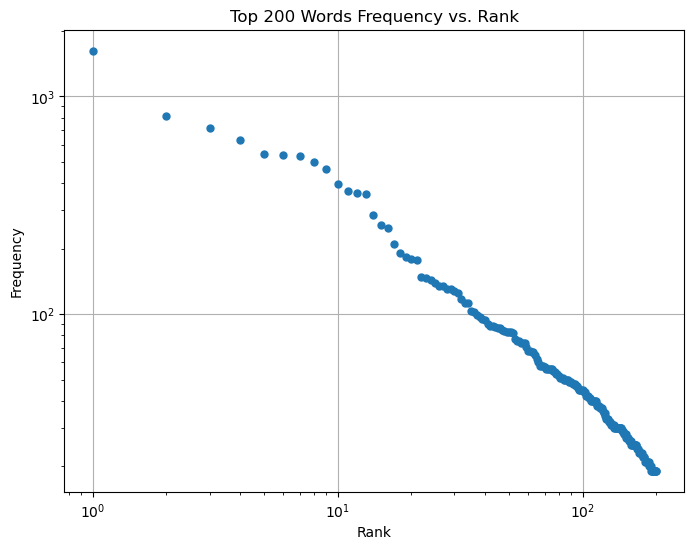

In [11]:
frequencies = [freq for word, freq in top_200_words]
ranks = list(range(1, 201))

plt.figure(figsize=(8, 6))
plt.loglog(ranks, frequencies, marker=".", linestyle='None', markersize=10)
plt.title('Top 200 Words Frequency vs. Rank')
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# 7. Ways in which the frequency of words in this corpora differs from "all words in all corpora"

Alice's Adventures in Wonderland is a fantasy novel. Therefore we can can expect some enstranged words that may pertain to the theme of the novel. For example, the word 'gryphon', a mystical creature, appears 54 times. There also seems to be more formal variation of some words, like 'dormouse'. In day to day corpora one may find it simply written as 'mouse'.